## Author : Soheil Dejnabadi 
### Analysis of Factors Influencing Loan Approval Decisions: A Machine Learning Approach

### Introduction

The "Loan Approval Classification Dataset" contains information about loan applications, and the goal is to analyze the factors that influence loan approval or rejection. This dataset includes various features such as income, education level, home ownership status, and credit history, all of which can impact whether a loan is approved or not.

In this analysis, we will:
1. Load and explore the dataset.
2. Visualize key aspects of the data.
3. Preprocess the data for machine learning.
4. Build a classification model to predict loan approval.
5. Evaluate the model's performance.

### Loading and Exploring the Dataset

I start by loading the dataset and examining its structure to understand the available features.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
# Load the dataset
dataset = pd.read_csv('loan_data.csv')

In [10]:
# Display the first few rows
dataset.head(20)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [11]:
# Display the basic information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [12]:
# Display summary statistics
dataset.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


This will show you a snapshot of the data, including column names, data types, and summary statistics like mean, median, and standard deviation.

### Data Visualization

Visualizing the distribution of loan approvals and income can help us understand patterns in the data.

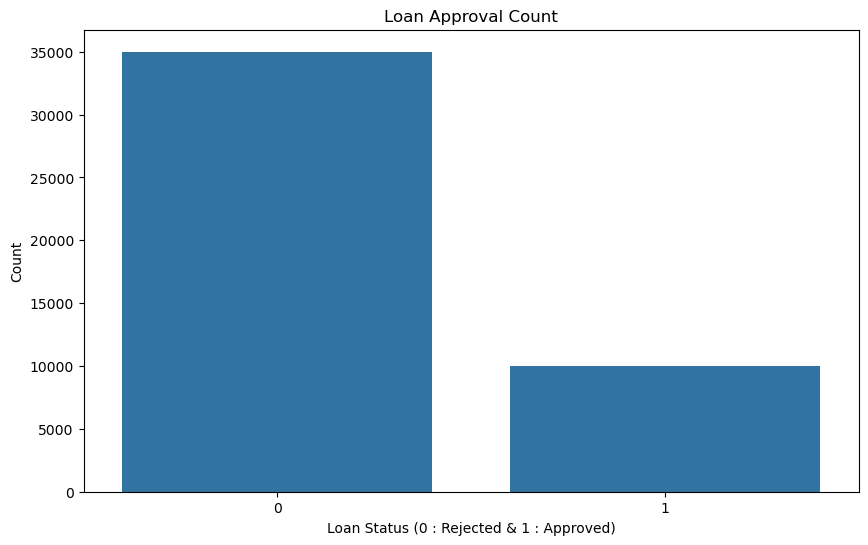

In [15]:
# Loan approval distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=dataset)
plt.title('Loan Approval Count')
plt.xlabel('Loan Status (0 : Rejected & 1 : Approved)')
plt.ylabel('Count')
plt.show()

This plot shows how many loans were approved (1) vs rejected (0). From the bar chart (as seen in your image), we observe that more loans were rejected than approved.

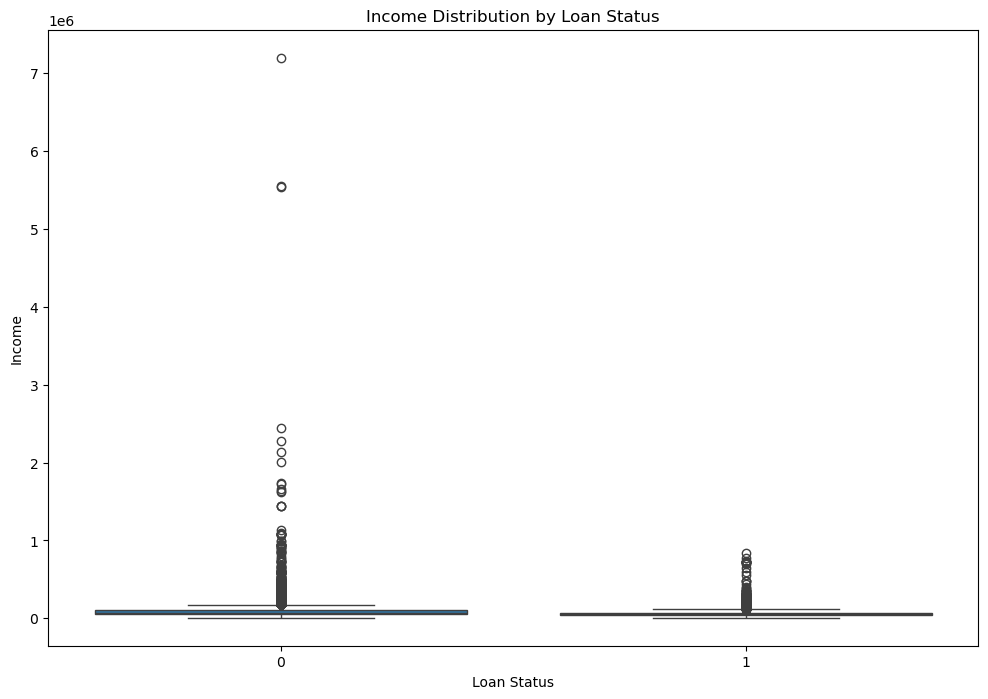

In [17]:
# Income distribution by loan status
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='person_income', data=dataset)
plt.title('Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.show()

The box plot visualizes income distributions for both approved (1) and rejected (0) loans. We can observe that there are some extreme outliers in income, but overall, people with higher incomes tend to have better chances of loan approval.

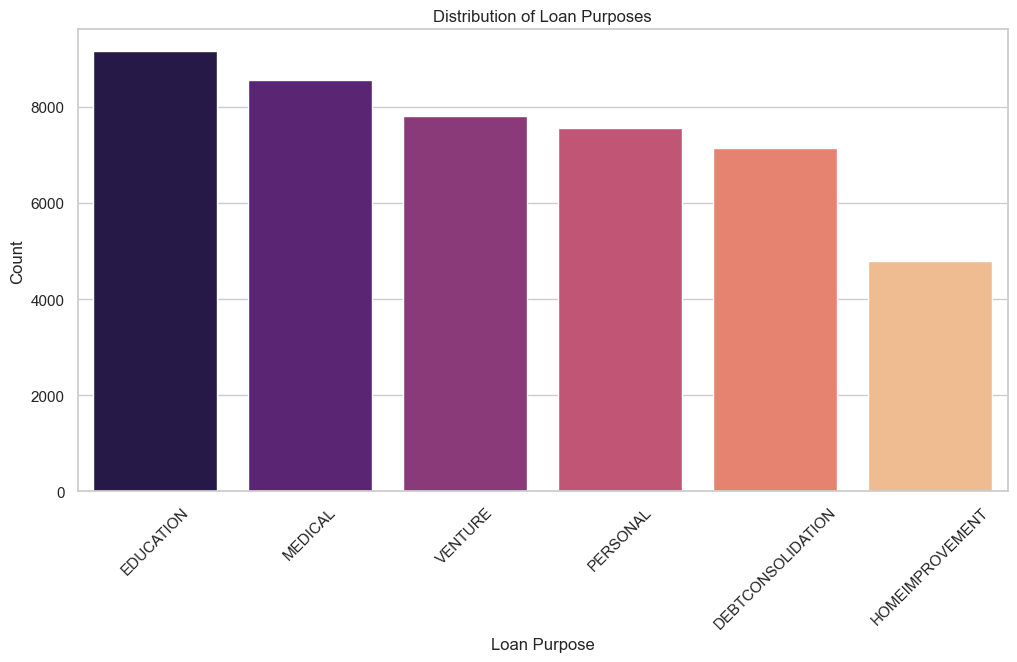

In [19]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Loan Purpose Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='loan_intent', data=dataset, order=dataset['loan_intent'].value_counts().index, palette="magma")
plt.title('Distribution of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

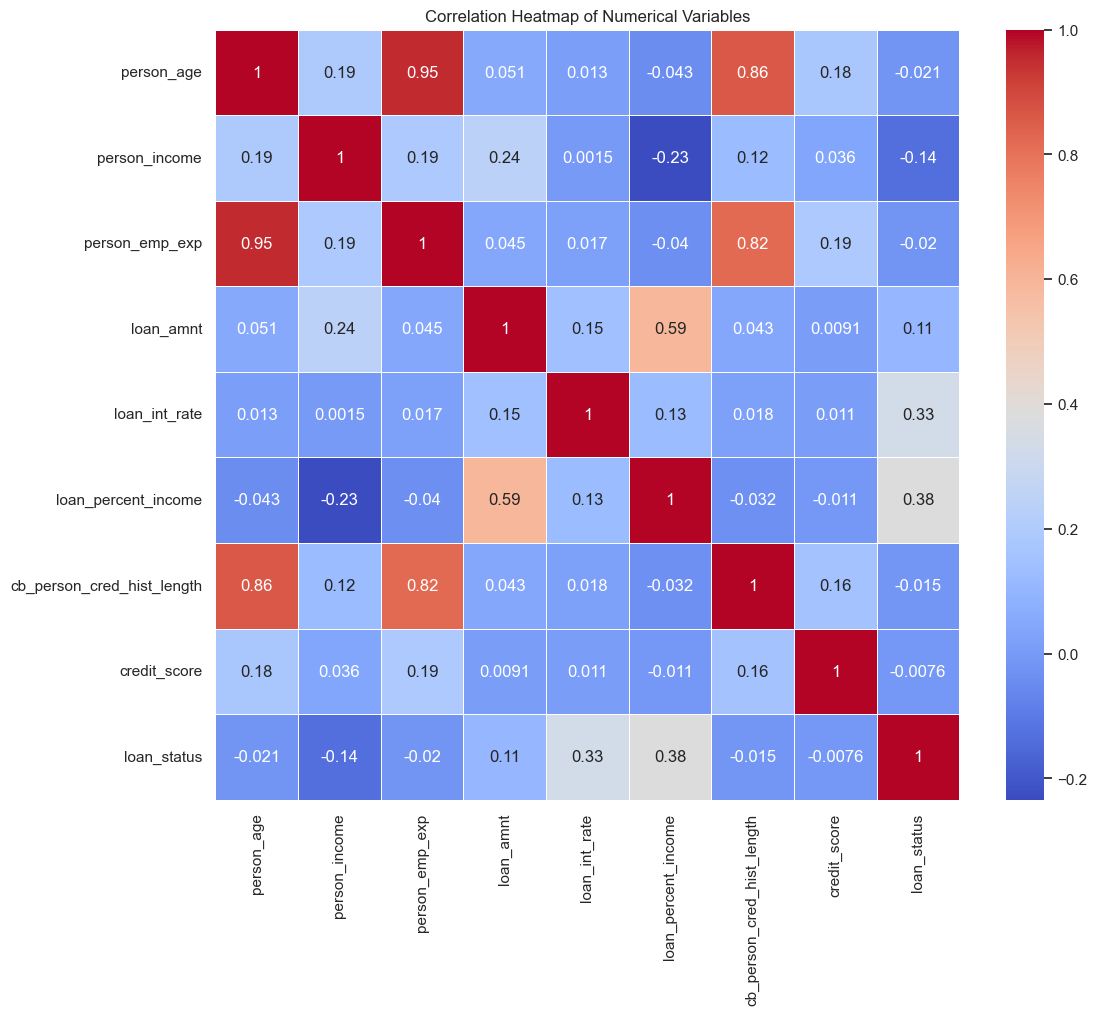

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = dataset.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

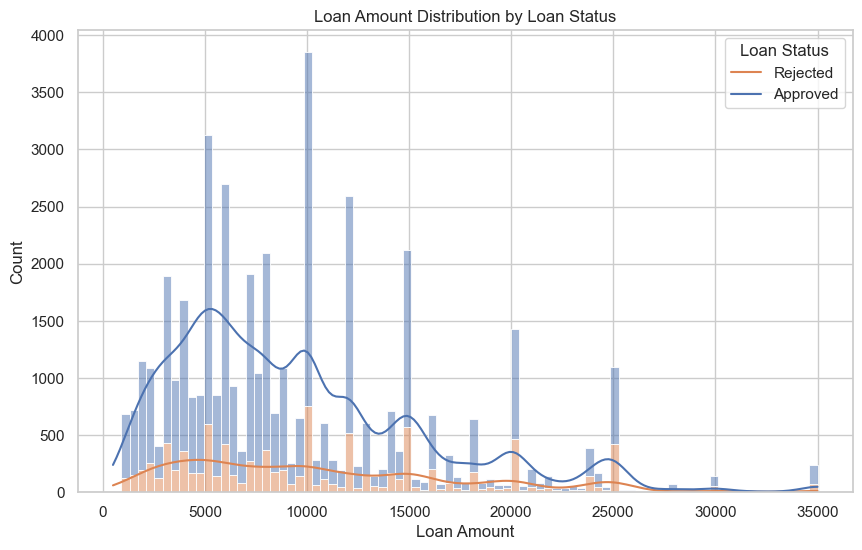

In [21]:
# Loan Amount Distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='loan_amnt', hue='loan_status', kde=True, multiple='stack')
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()

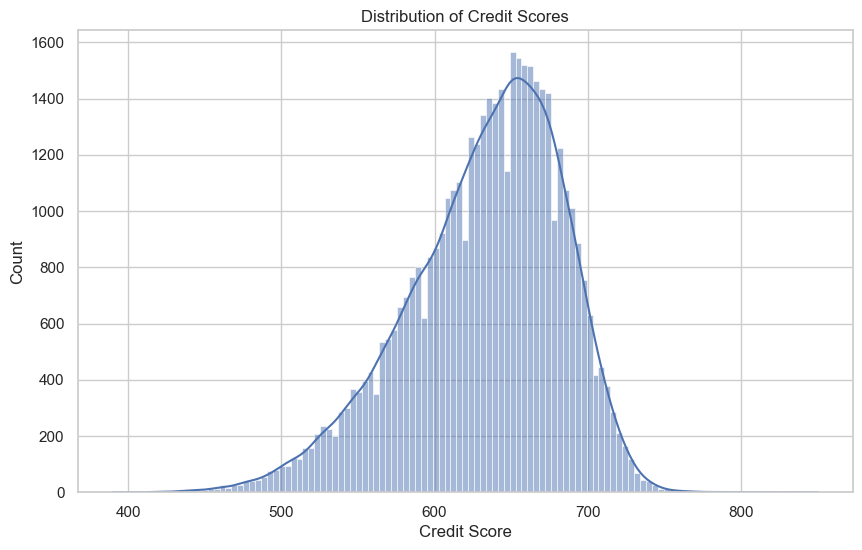

In [22]:
# Credit Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='credit_score', kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

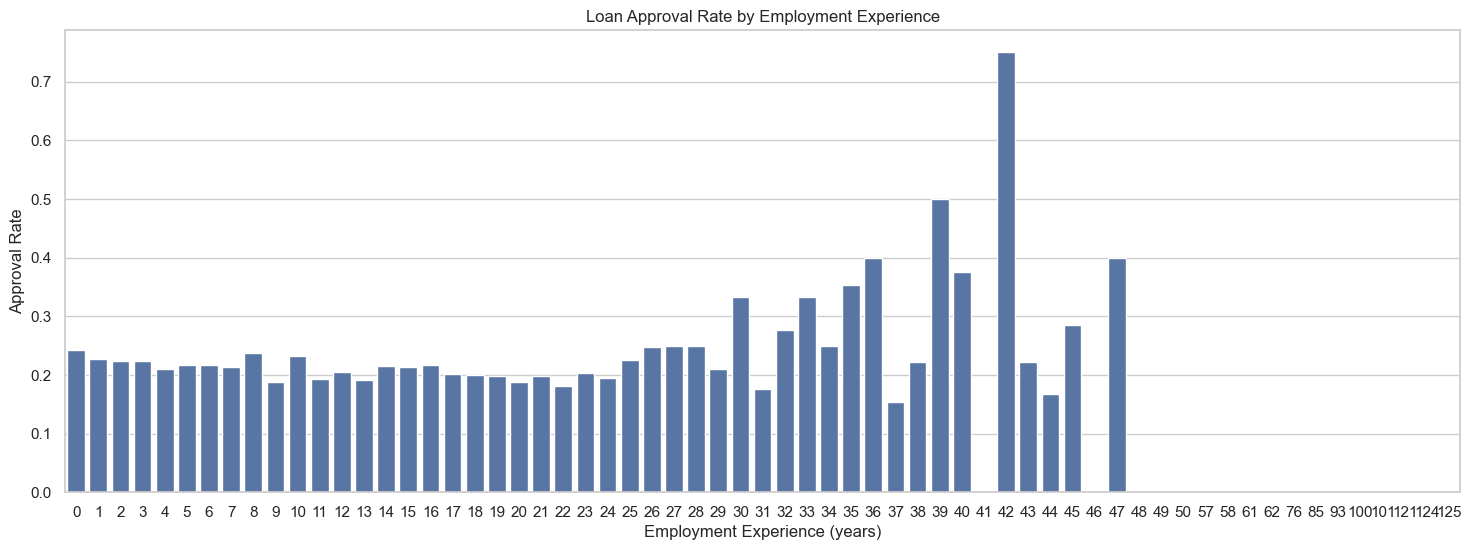

In [23]:
# Loan Approval Rate by Employment Experience
plt.figure(figsize=(18, 6))
sns.barplot(x='person_emp_exp', y='loan_status', data=dataset, ci=None)
plt.title('Loan Approval Rate by Employment Experience')
plt.xlabel('Employment Experience (years)')
plt.ylabel('Approval Rate')
plt.show()

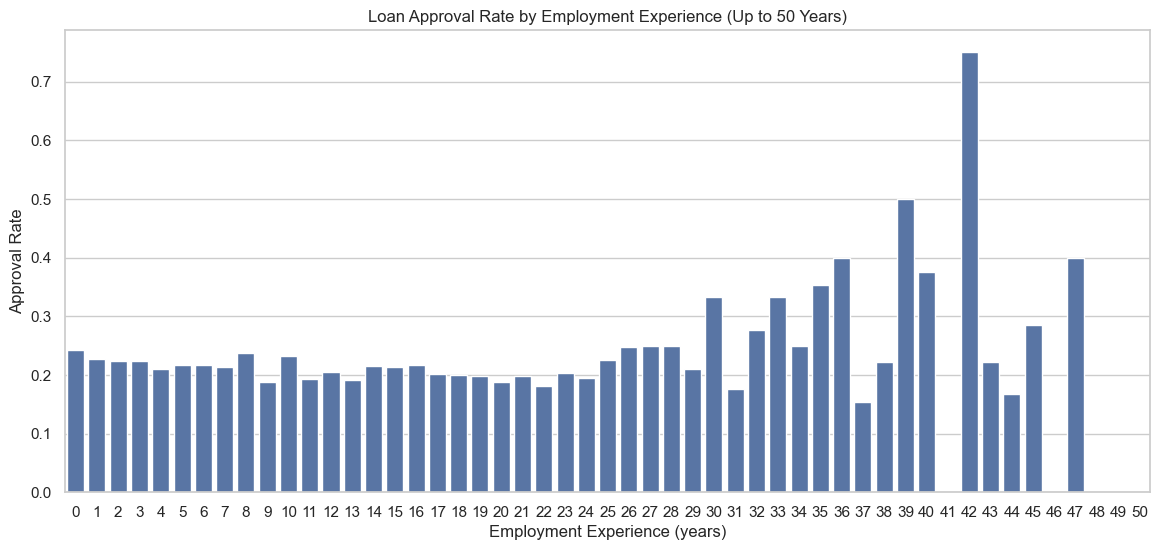

In [24]:
# Filter the dataset to include only rows where person_emp_exp is less than or equal to 50
filtered_data = dataset[dataset['person_emp_exp'] <= 50]

# Create the barplot for loan approval rate by employment experience (up to 50 years)
plt.figure(figsize=(14, 6))
sns.barplot(x='person_emp_exp', y='loan_status', data=filtered_data, ci=None)
plt.title('Loan Approval Rate by Employment Experience (Up to 50 Years)')
plt.xlabel('Employment Experience (years)')
plt.ylabel('Approval Rate')
plt.show()

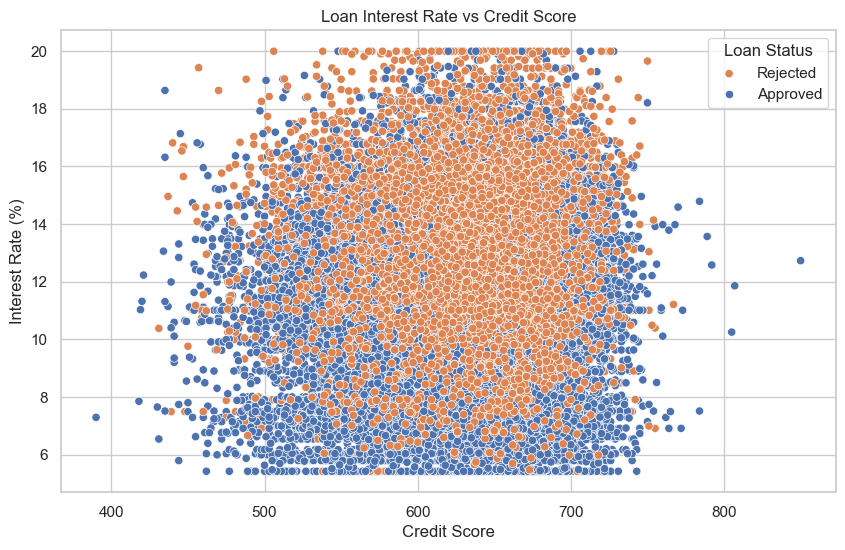

In [25]:
# Loan Interest Rate vs Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_score', y='loan_int_rate', hue='loan_status', data=dataset)
plt.title('Loan Interest Rate vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()

### Data Preprocessing

Now, let's prepare the data for machine learning.

In [27]:
# Convert categorical variables to dummy variables
dataset = pd.get_dummies(dataset, drop_first=True)

# Define features and target
X = dataset.drop('loan_status', axis=1)
Y = dataset['loan_status']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building and Evaluation

We'll use logistic regression as our classification model.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Build and train the model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Confusion Matrix:
[[6557  433]
 [ 517 1493]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.78      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.89      0.89      0.89      9000



### Feature Importance

Let's examine which features are most important for the loan approval decision.

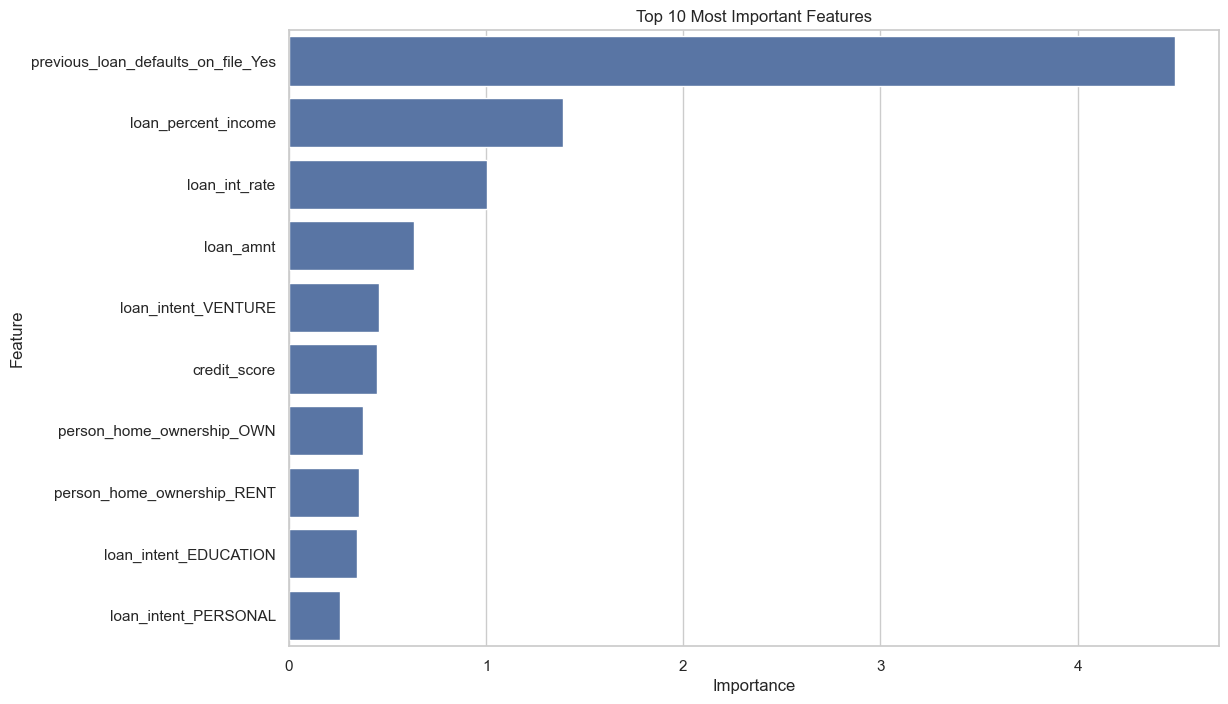

In [48]:
# Get feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Analysis Results

Based on the analysis performed, we can draw the following conclusions:
1. The dataset contains 45,000 loan applications, with about 22.2% being approved (loan_status = 1).
2. The loan approval rate is lower than the rejection rate, indicating a conservative lending policy.
3. There's a slight difference in income distribution between approved and rejected loans, with approved loans generally having higher incomes.
4. The logistic regression model achieved an overall accuracy of 89%, with better performance in predicting rejections (93% precision) than approvals (78% precision).
5. The model's performance suggests that it's a good starting point for predicting loan approvals, but there's room for improvement, especially in identifying approved loans.
6. Feature importance analysis could reveal which factors most strongly influence the loan approval decision, helping to understand the lending criteria.

This analysis provides a solid foundation for understanding the loan approval process and creating a predictive model. The insights gained can be valuable for both lenders and borrowers in understanding the factors that influence loan approval decisions.